In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
import pickle
import re

import evaluation

import pandas as pd


/home/peter/anaconda3/lib/python3.8/site-packages/ray/autoscaler/_private/cli_logger.py:57: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
  warnings.warn(


In [40]:
# base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/'
# exp_dirs = ['MA_DQN2/']
base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/big1/MA/'
exp_dirs = ['/home/peter/Documents/ML/rl_ipd/MA_runs/big1/MA/MA_DQN1/',
            '/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/MA_DQN2/']
exp_dirs = ['/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/MA_DQN2/']

# exp_dir = exp_dirs[0]
titles= ['DQN, hiddens=[1024,512,256,32,8]']

# exp_dirs = ['/home/peter/Documents/ML/rl_ipd/more_runs/MA_random_length_DQN2/', 
#             '/home/peter/Documents/ML/rl_ipd/more_runs/MA_random_length_nodoneatend_DQN2/']
# titles=['DQN, hiddens=[1024,512,256,32,8]', 'DQN, hiddens=[1024,512,256,32,8],no done']
exp_dirs = ['MA_random_length_DQN2/', 'MA_random_length_nodoneatend_DQN2/', 'MA_random_length_nodoneatend_DQN2_2/','MA_random_length_DQN3/']
titles = exp_dirs

for dir_num, exp_dir in enumerate(exp_dirs):

    # exp_dir = 'PPO_single_t4td/'
    data1 = pd.read_pickle(exp_dir + 'data_save')
    lr_options  = sorted(data1['lr'].unique())
    gamma_options = sorted(data1['gamma'].unique())

    ep_mean_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    t4t_frac0_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac0_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan
    t4t_frac1_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac1_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan

    for ii in range(len(data1)):
        lr_i = lr_options.index(data1.loc[ii].lr)

        gamma_i = gamma_options.index(data1.loc[ii].gamma)


        ep_mean_arr[lr_i, gamma_i] = data1.loc[ii].final_episode_reward_mean

        t4t_frac0_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac0
        coop_frac0_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac0
        t4t_frac1_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac1
        coop_frac1_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac1
        
    fig = plt.figure(figsize=(6,5))

    for ii, (t4t_frac_arr, coop_frac_arr) in enumerate([(t4t_frac0_arr, coop_frac0_arr),(t4t_frac1_arr, coop_frac1_arr)]):
        fig.add_subplot(2,2,1+ii*2)

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, t4t_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.ylabel('Learning rate', fontsize=15)
        plt.xlabel('$\gamma$', fontsize=15)
        plt.title(f'agent-{ii}: fraction tit-for-tat', fontsize=15)
        plt.colorbar()
        plt.clim([0,1])

        fig.add_subplot(2,2,2+ii*2)

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, coop_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25,);
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.colorbar()
        plt.ylabel('Learning rate', fontsize=15)
        plt.xlabel('$\gamma$', fontsize=15)
        plt.title(f'agent-{ii}: fraction cooperate', fontsize=15)
        plt.suptitle(titles[dir_num], fontsize=15)
        plt.clim([0,1])
        print(exp_dir)
        print('max t4t frac: ',np.max(np.nan_to_num(t4t_frac_arr)))
        print('mean t4t frac: ',np.mean(np.nan_to_num(t4t_frac_arr)))
        print('std t4t frac: ',np.std(np.nan_to_num(t4t_frac_arr)))


FileNotFoundError: [Errno 2] No such file or directory: 'MA_random_length_DQN2/data_save'

0
MA_random_length_PPO2/
max t4t frac:  0.63
mean t4t frac:  0.478
std t4t frac:  0.06373905134740136
1
MA_random_length_PPO2/
max t4t frac:  0.59
mean t4t frac:  0.476
std t4t frac:  0.05301572093885612
0
MA_random_length_nodoneatend_PPO2/
max t4t frac:  0.62
mean t4t frac:  0.5073333333333334
std t4t frac:  0.06043913375362761
1
MA_random_length_nodoneatend_PPO2/
max t4t frac:  0.63
mean t4t frac:  0.4913333333333333
std t4t frac:  0.0646391694116054


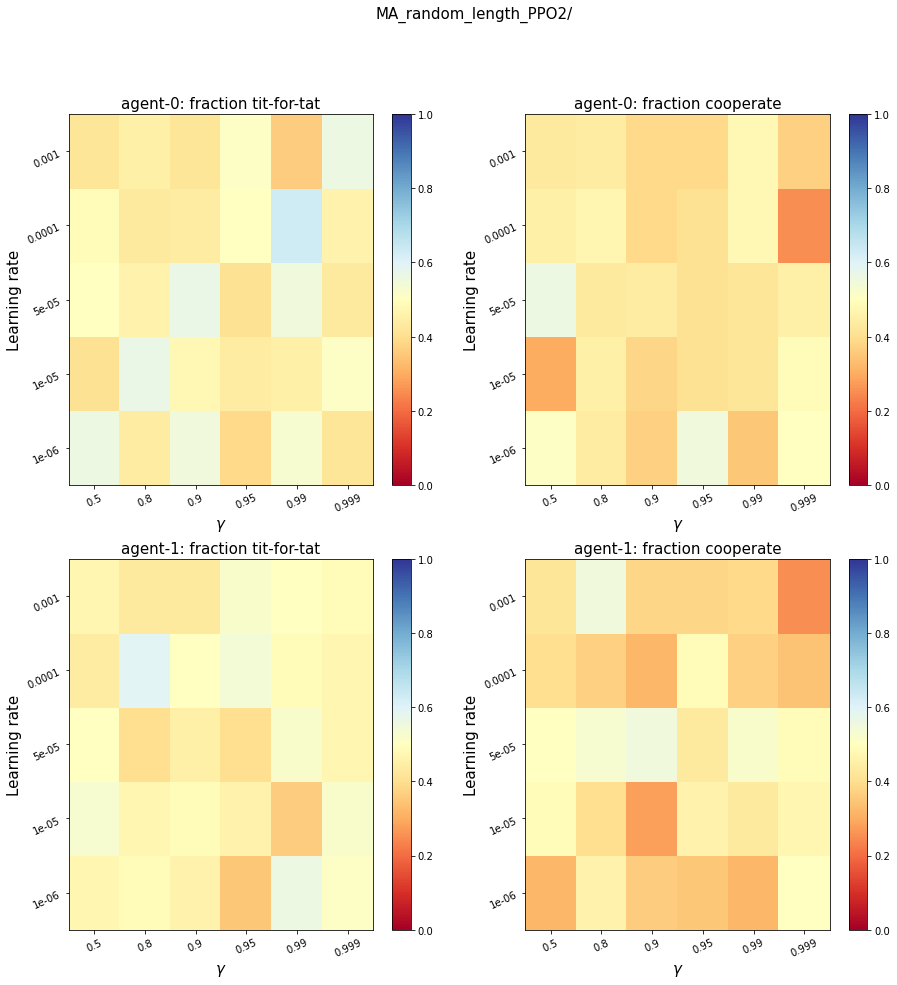

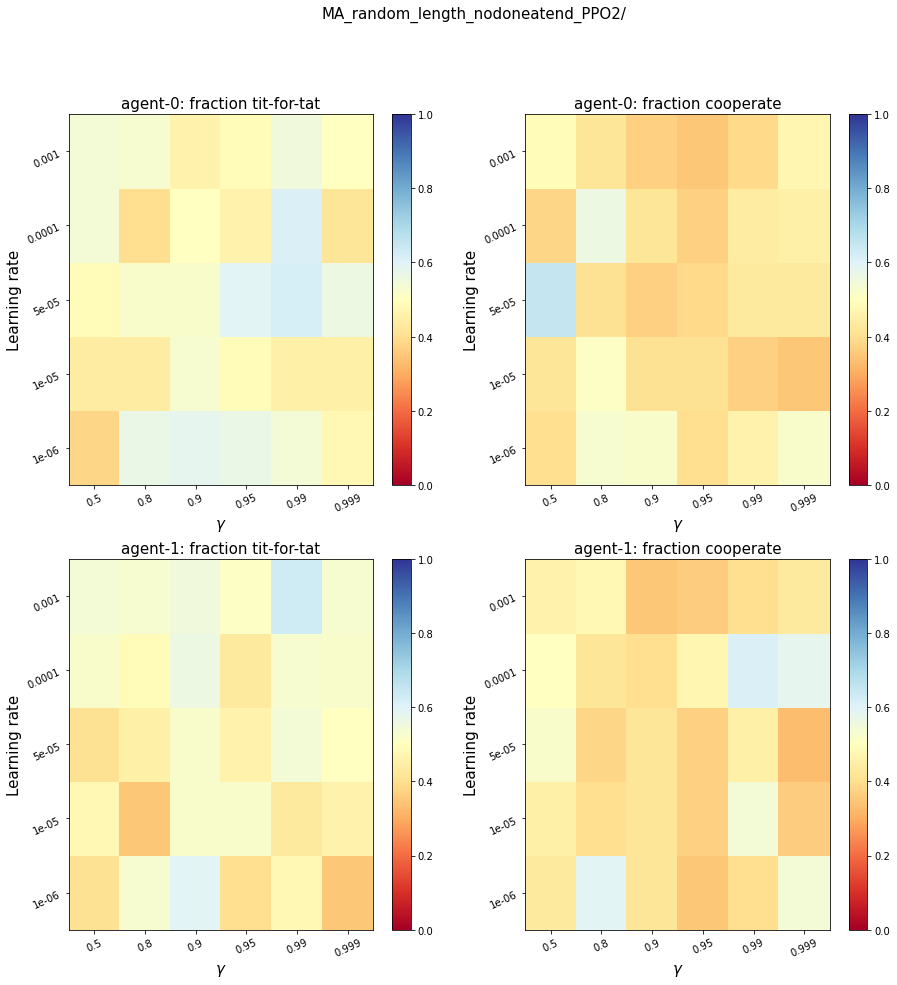

In [41]:
base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/'
exp_dirs = ['MA_PPO2/']

# base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/big1/MA/'
# exp_dirs = ['MA_PPO1/']

exp_dir = exp_dirs[0]

titles= ['PPO, hiddens=[1024,512,256,32,8]']


base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/'
exp_dirs = ['MA_random_length_PPO2/', 
            'MA_random_length_nodoneatend_PPO2/']
titles=['PPO, hiddens=[1024,512,256,32,8]', 'PPO, hiddens=[1024,512,256,32,8],no done']
exp_dirs = ['MA_random_length_PPO2/', 'MA_random_length_nodoneatend_PPO2/']
titles= exp_dirs

for dir_num, exp_dir in enumerate(exp_dirs):

    # exp_dir = 'PPO_single_t4td/'
    data1 = pd.read_pickle(base_dir + exp_dir + 'data_save')
    lr_options  = sorted(data1['lr'].unique())
    gamma_options = sorted(data1['gamma'].unique())

    ep_mean_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    t4t_frac0_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac0_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan
    t4t_frac1_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac1_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan

    for ii in range(len(data1)):
        lr_i = lr_options.index(data1.loc[ii].lr)

        gamma_i = gamma_options.index(data1.loc[ii].gamma)


        ep_mean_arr[lr_i, gamma_i] = data1.loc[ii].final_episode_reward_mean

        t4t_frac0_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac0
        coop_frac0_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac0
        t4t_frac1_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac1
        coop_frac1_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac1
        
    fig = plt.figure(figsize=(15,15))

    
    for ii, (t4t_frac_arr, coop_frac_arr) in enumerate([(t4t_frac0_arr, coop_frac0_arr),(t4t_frac1_arr, coop_frac1_arr)]):
        print(ii)
        fig.add_subplot(2,2,1+ii*2)

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, t4t_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.ylabel('Learning rate', fontsize=15)
        plt.xlabel('$\gamma$', fontsize=15)
        plt.title(f'agent-{ii}: fraction tit-for-tat', fontsize=15)
        plt.colorbar()
        plt.clim([0,1])

        fig.add_subplot(2,2,2+ii*2)

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, coop_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.colorbar()
        plt.ylabel('Learning rate', fontsize=15)
        plt.xlabel('$\gamma$', fontsize=15)
        plt.title(f'agent-{ii}: fraction cooperate', fontsize=15)
        plt.suptitle(titles[dir_num], fontsize=15)
        plt.clim([0,1])
        print(exp_dir)
        print('max t4t frac: ',np.max(np.nan_to_num(t4t_frac_arr)))
        print('mean t4t frac: ',np.mean(np.nan_to_num(t4t_frac_arr)))
        print('std t4t frac: ',np.std(np.nan_to_num(t4t_frac_arr)))


MA_random_length_DQN2/
max t4t frac:  0.61
mean t4t frac:  0.5086666666666667
std t4t frac:  0.06422529788867382
MA_random_length_DQN2/
max t4t frac:  0.62
mean t4t frac:  0.5009999999999999
std t4t frac:  0.05399691349203828
MA_random_length_nodoneatend_DQN2_2/
max t4t frac:  0.63
mean t4t frac:  0.49966666666666676
std t4t frac:  0.05907528153880343
MA_random_length_nodoneatend_DQN2_2/
max t4t frac:  0.64
mean t4t frac:  0.517
std t4t frac:  0.05733817808987888
MA_random_length_DQN3/
max t4t frac:  0.6
mean t4t frac:  0.517
std t4t frac:  0.0405914605140868
MA_random_length_DQN3/
max t4t frac:  0.59
mean t4t frac:  0.5013333333333334
std t4t frac:  0.05530119548637463


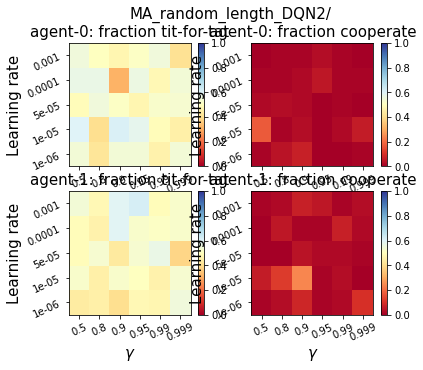

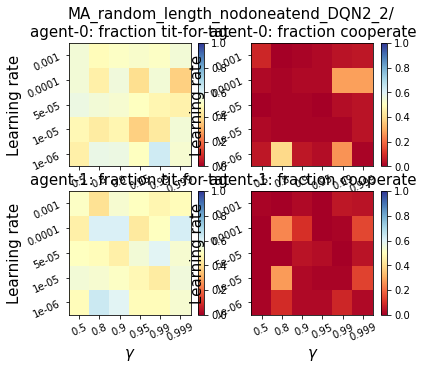

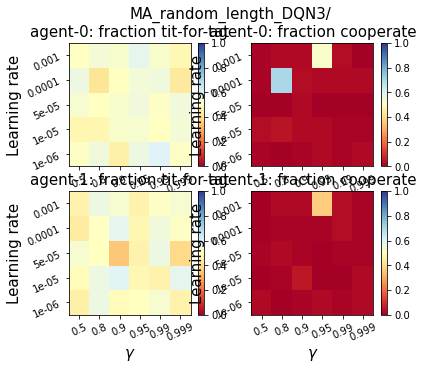

In [42]:
# base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/'
# exp_dirs = ['MA_DQN2/']
base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/big1/MA/'
exp_dirs = ['/home/peter/Documents/ML/rl_ipd/MA_runs/big1/MA/MA_DQN1/',
            '/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/MA_DQN2/']
exp_dirs = ['/home/peter/Documents/ML/rl_ipd/MA_no_done_at_end1/MA_DQN_no_done_at_end1/']
exp_dir = exp_dirs[0]
titles= ['DQN, hiddens=[1024,512,256,32,8]']

base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/'
exp_dirs = ['MA_random_length_DQN2/', 
            'MA_random_length_nodoneatend_DQN2/']
titles=['DQN, hiddens=[1024,512,256,32,8]', 'DQN, hiddens=[1024,512,256,32,8],no done']

exp_dirs = ['MA_random_length_DQN2/', 'MA_random_length_nodoneatend_DQN2/', 'MA_random_length_nodoneatend_DQN2_2/','MA_random_length_DQN3/']
exp_dirs = ['MA_random_length_DQN2/', 'MA_random_length_nodoneatend_DQN2_2/','MA_random_length_DQN3/']


titles = exp_dirs

for dir_num, exp_dir in enumerate(exp_dirs):

    # exp_dir = 'PPO_single_t4td/'
    data1 = pd.read_pickle(base_dir + exp_dir + 'data_save')
    lr_options  = sorted(data1['lr'].unique())
    gamma_options = sorted(data1['gamma'].unique())

    ep_mean_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    t4t_frac0_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac0_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan
    t4t_frac1_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac1_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan

    for ii in range(len(data1)):
        lr_i = lr_options.index(data1.loc[ii].lr)

        gamma_i = gamma_options.index(data1.loc[ii].gamma)


        ep_mean_arr[lr_i, gamma_i] = data1.loc[ii].final_episode_reward_mean

        t4t_frac0_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac0
        coop_frac0_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac0
        t4t_frac1_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac1
        coop_frac1_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac1
        
    fig = plt.figure(figsize=(6,5))

    for ii, (t4t_frac_arr, coop_frac_arr) in enumerate([(t4t_frac0_arr, coop_frac0_arr),(t4t_frac1_arr, coop_frac1_arr)]):
        fig.add_subplot(2,2,1+ii*2)

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, t4t_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.ylabel('Learning rate', fontsize=15)
        plt.xlabel('$\gamma$', fontsize=15)
        plt.title(f'agent-{ii}: fraction tit-for-tat', fontsize=15)
        plt.colorbar()
        plt.clim([0,1])

        fig.add_subplot(2,2,2+ii*2)

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, coop_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25,);
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.colorbar()
        plt.ylabel('Learning rate', fontsize=15)
        plt.xlabel('$\gamma$', fontsize=15)
        plt.title(f'agent-{ii}: fraction cooperate', fontsize=15)
        plt.suptitle(titles[dir_num], fontsize=15)
        plt.clim([0,1])
        print(exp_dir)
        print('max t4t frac: ',np.max(np.nan_to_num(t4t_frac_arr)))
        print('mean t4t frac: ',np.mean(np.nan_to_num(t4t_frac_arr)))
        print('std t4t frac: ',np.std(np.nan_to_num(t4t_frac_arr)))


0
MA_random_length_nodoneatend_PPO2/
max t4t frac:  0.62
mean t4t frac:  0.5073333333333334
std t4t frac:  0.06043913375362761
1
MA_random_length_nodoneatend_PPO2/
max t4t frac:  0.63
mean t4t frac:  0.4913333333333333
std t4t frac:  0.0646391694116054
0
MA_random_length_PPO2/
max t4t frac:  0.63
mean t4t frac:  0.478
std t4t frac:  0.06373905134740136
1
MA_random_length_PPO2/
max t4t frac:  0.59
mean t4t frac:  0.476
std t4t frac:  0.05301572093885612


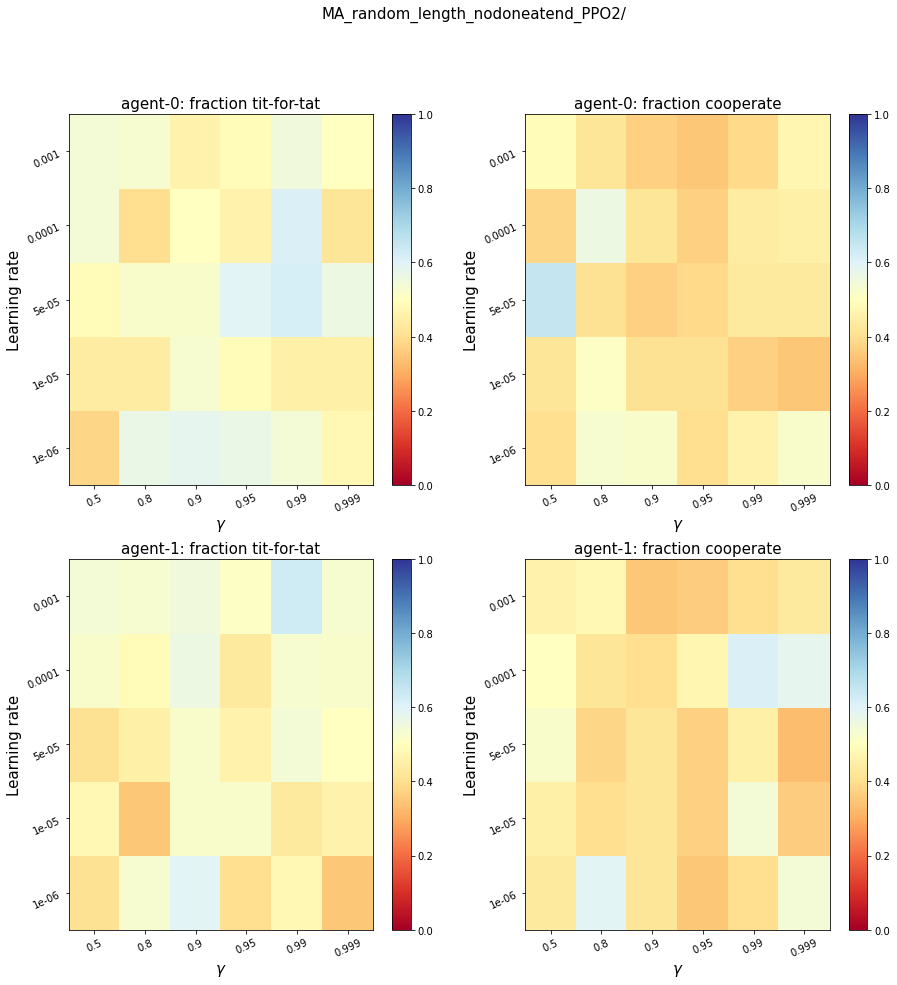

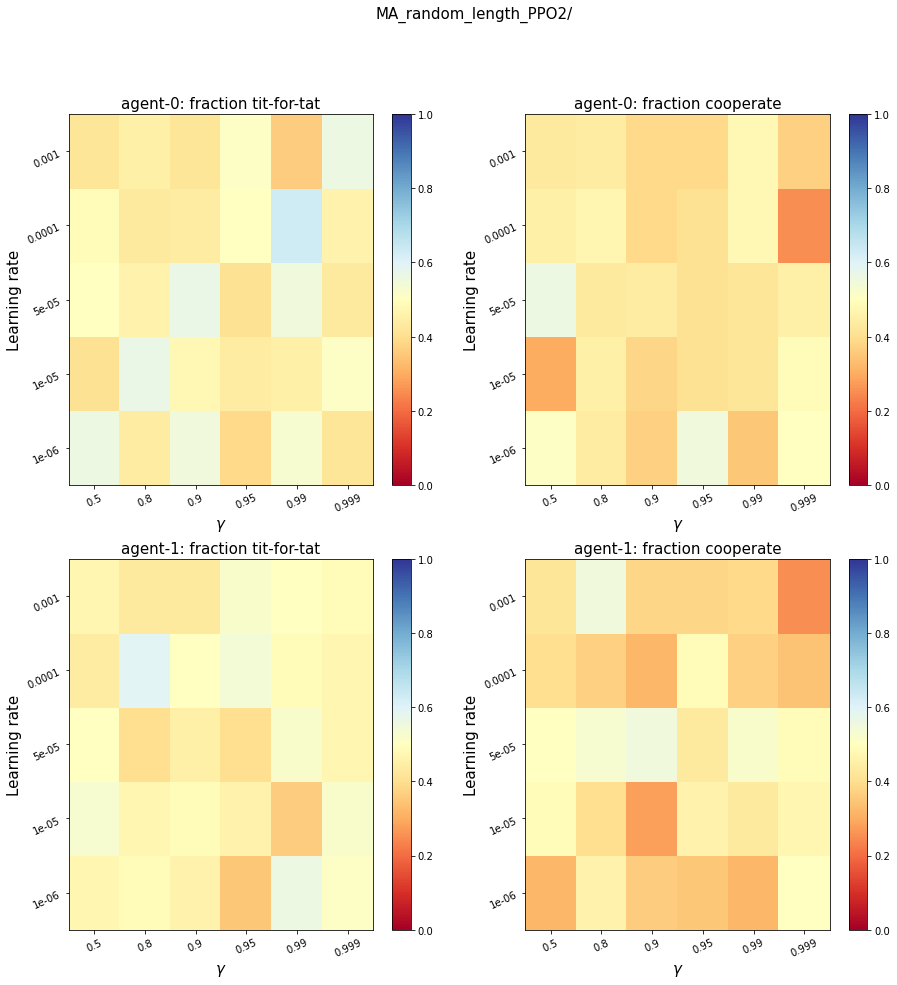

In [43]:
base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/'
exp_dirs = ['MA_PPO2/']

# base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/big1/MA/'
# exp_dirs = ['MA_PPO1/']

exp_dir = exp_dirs[0]

titles= ['PPO, hiddens=[1024,512,256,32,8]']

base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/'
exp_dirs = ['MA_random_length_nodoneatend_PPO2/','MA_random_length_PPO2/']
# exp_dirs = ['MA_PPO2/']

titles= exp_dirs

for dir_num, exp_dir in enumerate(exp_dirs):

    # exp_dir = 'PPO_single_t4td/'
    data1 = pd.read_pickle(base_dir + exp_dir + 'data_save')
#     print(data1)
    lr_options  = sorted(data1['lr'].unique())
    gamma_options = sorted(data1['gamma'].unique())

    ep_mean_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    t4t_frac0_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac0_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan
    t4t_frac1_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac1_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan

    for ii in range(len(data1)):
        lr_i = lr_options.index(data1.loc[ii].lr)

        gamma_i = gamma_options.index(data1.loc[ii].gamma)


        ep_mean_arr[lr_i, gamma_i] = data1.loc[ii].final_episode_reward_mean

        t4t_frac0_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac0
        coop_frac0_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac0
        t4t_frac1_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac1
        coop_frac1_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac1
        
    fig = plt.figure(figsize=(15,15))

    
    for ii, (t4t_frac_arr, coop_frac_arr) in enumerate([(t4t_frac0_arr, coop_frac0_arr),(t4t_frac1_arr, coop_frac1_arr)]):
        print(ii)
        fig.add_subplot(2,2,1+ii*2)

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, t4t_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.ylabel('Learning rate', fontsize=15)
        plt.xlabel('$\gamma$', fontsize=15)
        plt.title(f'agent-{ii}: fraction tit-for-tat', fontsize=15)
        plt.colorbar()
        plt.clim([0,1])

        fig.add_subplot(2,2,2+ii*2)

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, coop_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.colorbar()
        plt.ylabel('Learning rate', fontsize=15)
        plt.xlabel('$\gamma$', fontsize=15)
        plt.title(f'agent-{ii}: fraction cooperate', fontsize=15)
        plt.suptitle(titles[dir_num], fontsize=15)
        plt.clim([0,1])
        print(exp_dir)
        print('max t4t frac: ',np.max(np.nan_to_num(t4t_frac_arr)))
        print('mean t4t frac: ',np.mean(np.nan_to_num(t4t_frac_arr)))
        print('std t4t frac: ',np.std(np.nan_to_num(t4t_frac_arr)))


In [26]:
data1

,ID,gamma,lr,episode_reward_max,episode_reward_min,episode_reward_mean,coop_frac0,coop_frac1,final_episode_reward_max,final_episode_reward_mean,final_episode_reward_min,t4t_frac0,t4t_frac1
0,"PPO_two_agent_MG_env_81b79_00008_8_gamma=0.95,...",0.950,0.000100,"[450.0, 450.0, 428.0, 425.0, 401.0, 408.0, 407...","[2.0, 5.0, 5.0, 2.0, 5.0, 2.0, 4.0, 19.0, 2.0,...","[211.47619047619048, 211.64, 218.84, 217.35, 1...",0.53,0.52,361.0,147.87,5.0,0.60,0.50
1,"PPO_two_agent_MG_env_81b79_00009_9_gamma=0.9,l...",0.900,0.000100,"[450.0, 428.0, 440.0, 429.0, 438.0, 429.0, 433...","[2.0, 2.0, 11.0, 5.0, 6.0, 6.0, 5.0, 5.0, 5.0,...","[219.23456790123456, 225.81, 247.35, 238.02, 2...",0.40,0.48,436.0,248.85,14.0,0.53,0.51
2,"PPO_two_agent_MG_env_81b79_00016_16_gamma=0.8,...",0.800,0.000050,"[457.0, 457.0, 449.0, 452.0, 452.0, 460.0, 460...","[7.0, 7.0, 5.0, 5.0, 5.0, 7.0, 5.0, 8.0, 7.0, ...","[225.5443037974684, 232.07, 233.01, 220.37, 22...",0.58,0.46,418.0,233.76,2.0,0.44,0.43
3,"PPO_two_agent_MG_env_81b79_00017_17_gamma=0.5,...",0.500,0.000050,"[457.0, 425.0, 444.0, 440.0, 459.0, 459.0, 453...","[9.0, 11.0, 10.0, 5.0, 2.0, 13.0, 6.0, 23.0, 7...","[232.55263157894737, 213.27, 207.18, 226.43, 2...",0.50,0.55,464.0,236.23,5.0,0.54,0.51
4,"PPO_two_agent_MG_env_81b79_00011_11_gamma=0.5,...",0.500,0.000100,"[434.0, 443.0, 448.0, 457.0, 457.0, 453.0, 463...","[18.0, 2.0, 2.0, 39.0, 5.0, 2.0, 7.0, 8.0, 2.0...","[211.4047619047619, 239.16, 240.79, 225.06, 21...",0.32,0.41,455.0,219.14,2.0,0.47,0.49
5,PPO_two_agent_MG_env_81b79_00024_24_gamma=0.99...,0.999,0.000001,"[438.0, 452.0, 474.0, 455.0, 432.0, 457.0, 457...","[2.0, 6.0, 5.0, 5.0, 12.0, 2.0, 2.0, 12.0, 4.0...","[202.875, 228.31, 232.79, 239.75, 215.32, 214....",0.57,0.45,410.0,187.59,2.0,0.50,0.45
6,PPO_two_agent_MG_env_81b79_00012_12_gamma=0.99...,0.999,0.000050,"[451.0, 458.0, 472.0, 452.0, 438.0, 438.0, 439...","[5.0, 10.0, 10.0, 4.0, 9.0, 6.0, 6.0, 6.0, 2.0...","[219.92592592592592, 237.72, 217.6, 233.18, 22...",0.37,0.51,463.0,233.36,5.0,0.41,0.35
7,"PPO_two_agent_MG_env_81b79_00007_7_gamma=0.99,...",0.990,0.000100,"[453.0, 452.0, 452.0, 441.0, 451.0, 451.0, 440...","[11.0, 16.0, 7.0, 5.0, 2.0, 10.0, 5.0, 6.0, 14...","[221.1375, 233.6, 207.24, 193.37, 211.61, 214....",0.46,0.34,448.0,218.16,5.0,0.53,0.56
8,"PPO_two_agent_MG_env_81b79_00015_15_gamma=0.9,...",0.900,0.000050,"[447.0, 446.0, 446.0, 432.0, 432.0, 420.0, 427...","[12.0, 2.0, 12.0, 2.0, 2.0, 7.0, 4.0, 4.0, 5.0...","[227.8205128205128, 218.67, 226.92, 210.07, 23...",0.54,0.49,446.0,227.54,2.0,0.53,0.62
9,PPO_two_agent_MG_env_81b79_00006_6_gamma=0.999...,0.999,0.000100,"[442.0, 435.0, 433.0, 433.0, 433.0, 414.0, 410...","[5.0, 5.0, 10.0, 5.0, 4.0, 5.0, 2.0, 2.0, 12.0...","[222.33333333333331, 224.39, 211.98, 197.66, 2...",0.36,0.45,383.0,179.61,4.0,0.51,0.46


big1/MA/MA_DQN1/
max t4t frac:  0.6
mean t4t frac:  0.4578571428571428
std t4t frac:  0.17462252778746606
big1/MA/MA_DQN1/
max t4t frac:  0.63
mean t4t frac:  0.445952380952381
std t4t frac:  0.17174260258290636
small1/MA/MA_DQN2/
max t4t frac:  0.62
mean t4t frac:  0.5056666666666666
std t4t frac:  0.05919928678249051
small1/MA/MA_DQN2/
max t4t frac:  0.6
mean t4t frac:  0.49966666666666676
std t4t frac:  0.052566360176658826


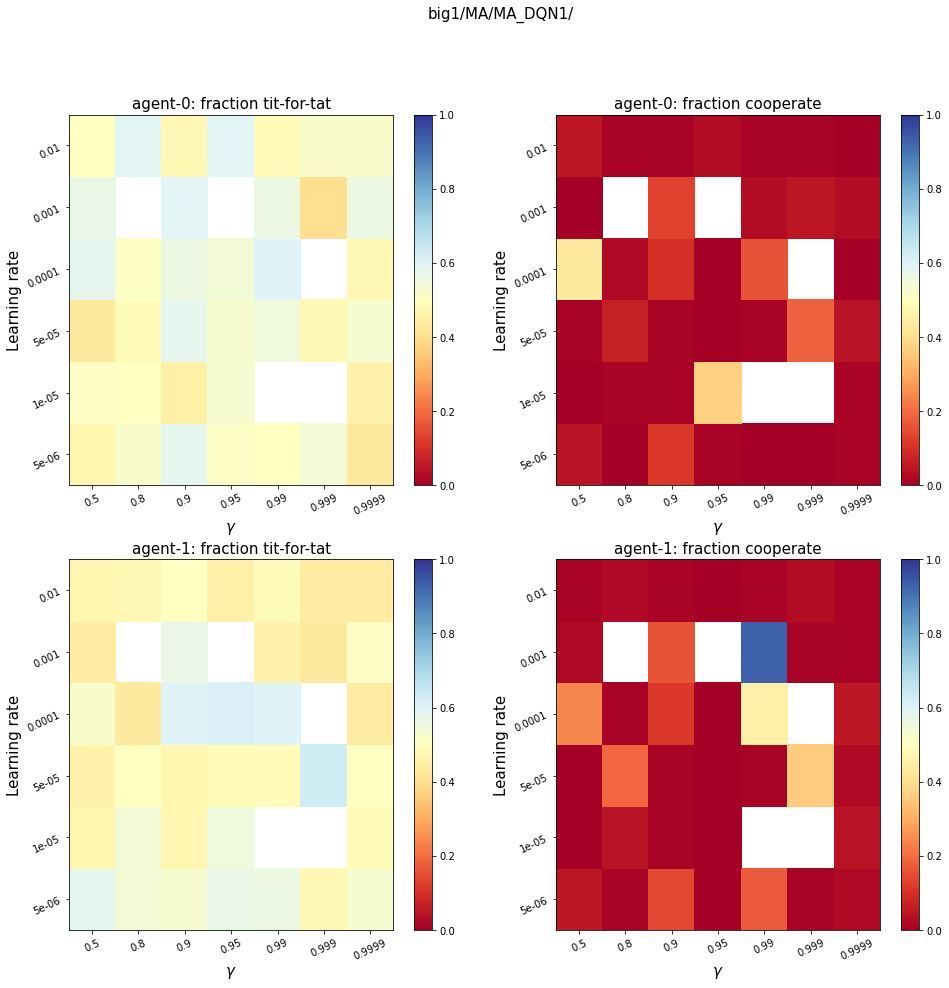

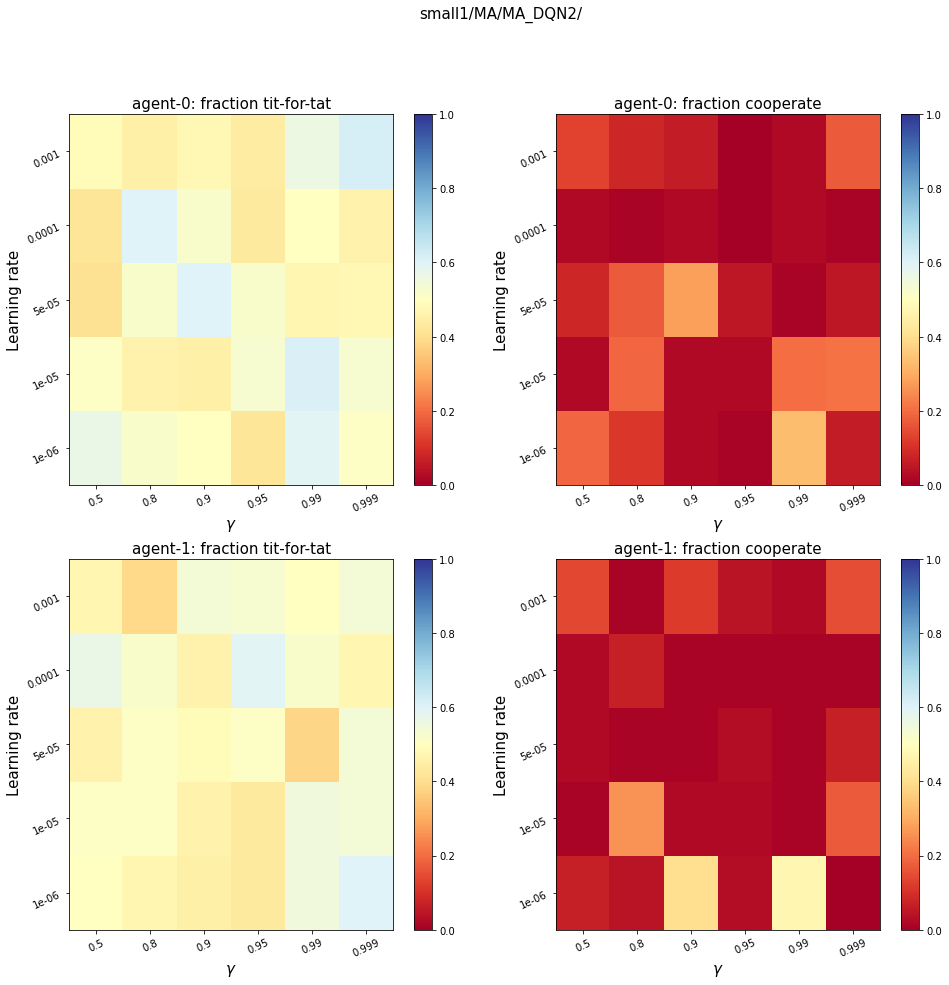

In [44]:
# base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/'
# exp_dirs = ['MA_DQN2/']
base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/'
exp_dirs = ['big1/MA/MA_DQN1/',
            'small1/MA/MA_DQN2/']
# exp_dirs = ['/home/peter/Documents/ML/rl_ipd/MA_no_done_at_end1/MA_DQN_no_done_at_end1/']
# exp_dir = exp_dirs[0]
# titles= ['DQN, hiddens=[1024,512,256,32,8]']

# base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/'
# exp_dirs = ['MA_random_length_DQN2/', 
#             'MA_random_length_nodoneatend_DQN2/']
# titles=['DQN, hiddens=[1024,512,256,32,8]', 'DQN, hiddens=[1024,512,256,32,8],no done']

# base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/MA_statelen/'
# exp_dirs = [
#             'MA_random_length_nodoneatend_DQN1_statelen1/',
#             'MA_random_length_nodoneatend_DQN2_statelen1/',
#             'MA_random_length_DQN1_statelen1/', 
#             'MA_random_length_DQN2_statelen1/',
#             'MA_random_length_nodoneatend_DQN1_statelen5/',
#             'MA_random_length_nodoneatend_DQN2_statelen5/',
#             'MA_random_length_DQN1_statelen5/', 
#             'MA_random_length_DQN2_statelen5/']

# exp_dirs = ['MA_random_length_DQN1_statelen1/', 'MA_random_length_DQN2_statelen1/',
# #             'MA_random_length_nodoneatend_DQN1_statelen5/','MA_random_length_nodoneatend_DQN2_statelen5/',
#             'MA_random_length_DQN1_statelen5/', 'MA_random_length_DQN2_statelen5/']

titles = exp_dirs

for dir_num, exp_dir in enumerate(exp_dirs):

    # exp_dir = 'PPO_single_t4td/'
    data1 = pd.read_pickle(base_dir + exp_dir + 'data_save')
    if len(data1) ==0:
        continue
    lr_options  = sorted(data1['lr'].unique())
    gamma_options = sorted(data1['gamma'].unique())

    ep_mean_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    t4t_frac0_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac0_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan
    t4t_frac1_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac1_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan

    for ii in range(len(data1)):
        lr_i = lr_options.index(data1.loc[ii].lr)

        gamma_i = gamma_options.index(data1.loc[ii].gamma)


        ep_mean_arr[lr_i, gamma_i] = data1.loc[ii].final_episode_reward_mean

        t4t_frac0_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac0
        coop_frac0_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac0
        t4t_frac1_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac1
        coop_frac1_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac1
        
    fig = plt.figure(figsize=(16,15))

    for ii, (t4t_frac_arr, coop_frac_arr) in enumerate([(t4t_frac0_arr, coop_frac0_arr),(t4t_frac1_arr, coop_frac1_arr)]):
        fig.add_subplot(2,2,1+ii*2)

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, t4t_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.ylabel('Learning rate', fontsize=15)
        plt.xlabel('$\gamma$', fontsize=15)
        plt.title(f'agent-{ii}: fraction tit-for-tat', fontsize=15)
        plt.colorbar()
        plt.clim([0,1])

        fig.add_subplot(2,2,2+ii*2)

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, coop_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25,);
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.colorbar()
        plt.ylabel('Learning rate', fontsize=15)
        plt.xlabel('$\gamma$', fontsize=15)
        plt.title(f'agent-{ii}: fraction cooperate', fontsize=15)
        plt.suptitle(titles[dir_num], fontsize=15)
        plt.clim([0,1])
        print(exp_dir)
        print('max t4t frac: ',np.max(np.nan_to_num(t4t_frac_arr)))
        print('mean t4t frac: ',np.mean(np.nan_to_num(t4t_frac_arr)))
        print('std t4t frac: ',np.std(np.nan_to_num(t4t_frac_arr)))


In [28]:
data1 = pd.read_pickle(base_dir + exp_dir + 'data1_save')


FileNotFoundError: [Errno 2] No such file or directory: '/home/peter/Documents/ML/rl_ipd/more_runs/MA_statelen/MA_random_length_DQN2_statelen5/data1_save'

In [ ]:
len(data1)

0
MA_random_length_nodoneatend_DQN1_statelen1/
max t4t frac:  0.58
mean t4t frac:  0.4903333333333333
std t4t frac:  0.05338435059911181
1
MA_random_length_nodoneatend_DQN1_statelen1/
max t4t frac:  0.63
mean t4t frac:  0.5020000000000001
std t4t frac:  0.047003545965526194
0
1


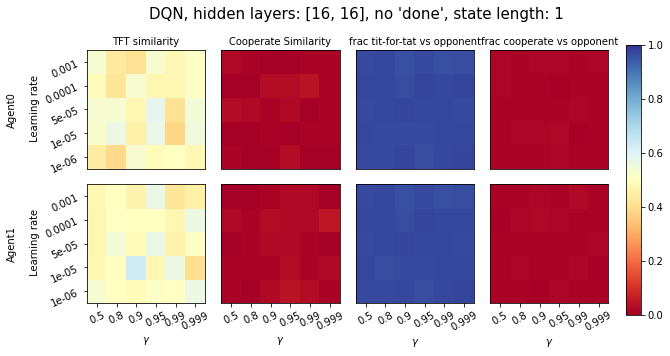

In [4]:
base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/'
exp_dirs = ['MA_PPO2/']

# base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/big1/MA/'
# exp_dirs = ['MA_PPO1/']

# base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/'
# exp_dirs = ['MA_DQN2/']

exp_dir = exp_dirs[0]

# base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/MA_lstm/'
base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/MA_statelen/'


exp_dirs = [
            'MA_random_length_nodoneatend_DQN1_statelen1/',
            'MA_random_length_nodoneatend_DQN2_statelen1/',
            'MA_random_length_DQN1_statelen1/', 
            'MA_random_length_DQN2_statelen1/',
            'MA_random_length_nodoneatend_DQN1_statelen5/',
            'MA_random_length_nodoneatend_DQN2_statelen5/',
            'MA_random_length_DQN1_statelen5/', 
            'MA_random_length_DQN2_statelen5/']

exp_dirs = ['MA_random_length_nodoneatend_PPO1_statelen1/',
            'MA_random_length_nodoneatend_PPO2_statelen1/',
            'MA_random_length_nodoneatend_PPO1_statelen5/',
            'MA_random_length_nodoneatend_PPO2_statelen5/',
            'MA_random_length_PPO1_statelen1/', 
            'MA_random_length_PPO2_statelen1/',
            'MA_random_length_PPO1_statelen5/', 
            'MA_random_length_PPO2_statelen5/'
            ]

exp_dirs = [
            'MA_random_length_nodoneatend_DQN1_statelen1/',
            'MA_random_length_nodoneatend_DQN2_statelen1/',
            'MA_random_length_nodoneatend_DQN1_statelen5/',
            'MA_random_length_nodoneatend_DQN2_statelen5/',
            'MA_random_length_DQN1_statelen1/', 
            'MA_random_length_DQN2_statelen1/',
            'MA_random_length_DQN1_statelen5/', 
            'MA_random_length_DQN2_statelen5/',
            'MA_random_length_nodoneatend_PPO1_statelen1/',
            'MA_random_length_nodoneatend_PPO2_statelen1/',
            'MA_random_length_nodoneatend_PPO1_statelen5/',
            'MA_random_length_nodoneatend_PPO2_statelen5/',
            'MA_random_length_PPO1_statelen1/', 
            'MA_random_length_PPO2_statelen1/',
            'MA_random_length_PPO1_statelen5/', 
            'MA_random_length_PPO2_statelen5/'
            ]
exp_dirs = [exp_dirs[0]]

def title_fun(exp_dir):
    title = ''
    
    if 'PPO' in exp_dir:
        title += 'PPO, '
    elif 'DQN' in exp_dir:
        title += 'DQN, '
        
    if '1_' in exp_dir:
        title += 'hidden layers: [16, 16], '
    elif '2_' in exp_dir:
        title += 'hidden layers: [1024,512,256,32,8], '
        
    if 'nodoneatend' in exp_dir:
        title += 'no \'done\', '
        
    if 'statelen1' in exp_dir:
        title += 'state length: 1, '

    elif 'statelen5' in exp_dir:
        title += 'state length: 5, '
    
    title = title[:-2]
    
    return title



titles = [title_fun(exp_dir) for exp_dir in exp_dirs]


# base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/MA_ppo_rerun_rl/'

# exp_dirs = ['MA_PPO2_same/', 'MA_PPO2_diff/', 'MA_PPO2_diff_sl5/', 'MA_PPO2_diff_sl5_2/']

# exp_dirs  = [exp_dirs[0]]

# base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/'
# exp_dirs = ['MA_random_length_DQN2/',
# #             'MA_random_length_DQN3/',
#             'MA_random_length_nodoneatend_DQN2_2/',
#             'MA_random_length_PPO2/', 
#             'MA_random_length_nodoneatend_PPO2/',
#            ]

# base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/MA_ppo_rerun'
# exp_dirs = [
#             '/MA_PPO2_diff/',
#             '/MA_PPO2_diff_sl5/',
#             '/MA_PPO2_diff_sl5_2/',
#             '_rl/MA_PPO2_diff/',
#             '_rl/MA_PPO2_diff_sl5/',
#             '_rl/MA_PPO2_diff_sl5_2/',
#            ]


# titles= exp_dirs
# titles = ['DQN',
#           'DQN, no \'done\' signal',
#           'PPO',
#           'PPO, no \'done\' signal']

# titles= ['DQN, hidden layers: 1024,512,256,32,8']
# titles= ['PPO, hidden layers: 1024,512,256,32,8']

title_fs = None
lr_fs = None
gamma_fs = None
for dir_num, exp_dir in enumerate(exp_dirs):

    # exp_dir = 'PPO_single_t4td/'
    data1 = pd.read_pickle(base_dir + exp_dir + 'data_save')
#     print(data1)
    if len(data1) == 0:
        continue
    lr_options  = sorted(data1['lr'].unique())
    gamma_options = sorted(data1['gamma'].unique())

    ep_mean_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    t4t_frac0_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac0_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan
    t4t_frac1_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac1_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan

    for ii in range(len(data1)):
        lr_i = lr_options.index(data1.loc[ii].lr)

        gamma_i = gamma_options.index(data1.loc[ii].gamma)


        ep_mean_arr[lr_i, gamma_i] = data1.loc[ii].final_episode_reward_mean

        t4t_frac0_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac0
        coop_frac0_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac0
        t4t_frac1_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac1
        coop_frac1_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac1
        
    fig = plt.figure(figsize=(10,5))

    plt_position_t4t = [1, 5]
    plt_position_coop = [2, 6]
    
    for ii, (t4t_frac_arr, coop_frac_arr) in enumerate([(t4t_frac0_arr, coop_frac0_arr),(t4t_frac1_arr, coop_frac1_arr)]):
        print(ii)
        fig.add_subplot(2,4,plt_position_t4t[ii])

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, t4t_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
        if ii == 0:
            plt.xticks([])
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.ylabel(f'Agent{ii}\n \n Learning rate', fontsize=lr_fs)
#         plt.xlabel('$\gamma$', fontsize=15)
        if ii == 1:
            plt.xlabel('$\gamma$', fontsize=gamma_fs)
        if ii == 0:
            plt.title(f'TFT similarity', fontsize=title_fs)
#         plt.colorbar()
        plt.clim([0,1])

        fig.add_subplot(2,4,plt_position_coop[ii])

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, coop_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
        if ii == 0:
            plt.xticks([])
#         plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.yticks([])
#         plt.colorbar()
#         plt.ylabel('Learning rate', fontsize=15)
#         plt.xlabel('$\gamma$', fontsize=15)
        if ii == 1:
            plt.xlabel('$\gamma$', fontsize=gamma_fs)
        if ii == 0:
            plt.title(f'Cooperate Similarity', fontsize=title_fs)
        plt.suptitle(titles[dir_num], fontsize=gamma_fs)
        plt.clim([0,1])
        print(exp_dir)
        print('max t4t frac: ',np.max(np.nan_to_num(t4t_frac_arr)))
        print('mean t4t frac: ',np.mean(np.nan_to_num(t4t_frac_arr)))
        print('std t4t frac: ',np.std(np.nan_to_num(t4t_frac_arr)))

    # exp_dir = 'PPO_single_t4td/'
    data1 = pd.read_pickle(base_dir + exp_dir + 'data_save_play_agents2')
#     print(data1)
    if len(data1) == 0:
        continue
    lr_options  = sorted(data1['lr'].unique())
    gamma_options = sorted(data1['gamma'].unique())

    ep_mean_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    t4t_frac0_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac0_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan
    t4t_frac1_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac1_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan

    
    
    plt_position_t4t = [3, 7]
    plt_position_coop = [4, 8]
    
    for ii in range(len(data1)):
        lr_i = lr_options.index(data1.loc[ii].lr)

        gamma_i = gamma_options.index(data1.loc[ii].gamma)


        ep_mean_arr[lr_i, gamma_i] = data1.loc[ii].final_episode_reward_mean

        t4t_frac0_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac0
        coop_frac0_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac0
        t4t_frac1_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac1
        coop_frac1_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac1
    
    for ii, (t4t_frac_arr, coop_frac_arr) in enumerate([(t4t_frac0_arr, coop_frac0_arr),(t4t_frac1_arr, coop_frac1_arr)]):
        print(ii)
        fig.add_subplot(2,4,plt_position_t4t[ii])

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, t4t_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=30);
        if ii == 0:
            plt.xticks([])
#         plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.yticks([])
#         plt.ylabel('Learning rate', fontsize=15)
#         plt.xlabel('$\gamma$', fontsize=15)
        if ii == 1:
            plt.xlabel('$\gamma$', fontsize=gamma_fs)
        if ii == 0:
            plt.title(f'frac tit-for-tat vs opponent', fontsize=title_fs)
#         plt.colorbar()
        plt.clim([0,1])

        fig.add_subplot(2,4,plt_position_coop[ii])

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        im = plt.pcolor(x1, y1, coop_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=30);
        if ii == 0:
            plt.xticks([])
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.yticks([])
#         plt.colorbar()
#         plt.ylabel('Learning rate', fontsize=15)
        if ii == 1:
            plt.xlabel('$\gamma$', fontsize=gamma_fs)
        if ii == 0:
            plt.title(f'frac cooperate vs opponent', fontsize=title_fs)
        plt.suptitle(titles[dir_num], fontsize=15)
        plt.clim([0,1])
    plt.tight_layout()
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.875, 0.125, 0.02, 0.75])
    fig.colorbar(im, cax=cbar_ax)
    

    plt.savefig('grid_' + exp_dir[:-1], bbox_inches='tight')
    


0
MA_DQN2/
max t4t frac:  0.62
mean t4t frac:  0.5056666666666666
std t4t frac:  0.05919928678249051
1
MA_DQN2/
max t4t frac:  0.6
mean t4t frac:  0.49966666666666676
std t4t frac:  0.052566360176658826
0
1


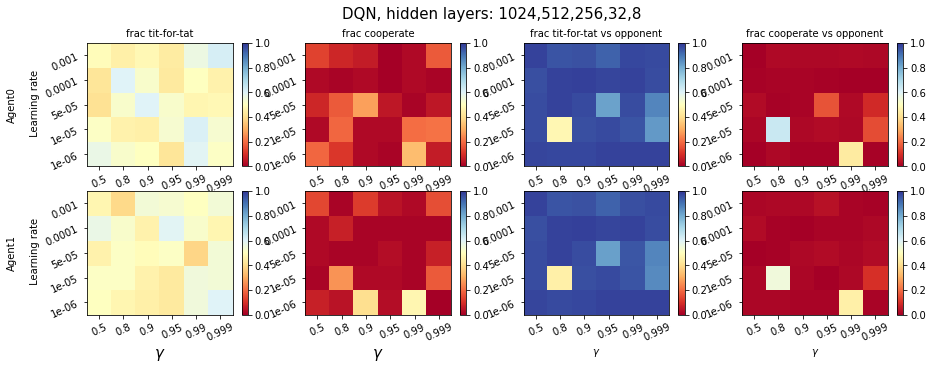

In [47]:
base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/'
exp_dirs = ['MA_DQN2/']

# base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/'
# exp_dirs = ['MA_PPO2/']

# exp_dir = exp_dirs[0]

# titles= ['PPO, hiddens=[1024,512,256,32,8]']

# base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/MA_lstm/'
# base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/MA_statelen/'
# exp_dirs = ['MA_random_length_nodoneatend_PPO1_statelen1/',
#             'MA_random_length_nodoneatend_PPO2_statelen1/',
#             'MA_random_length_nodoneatend_PPO1_statelen5/',
#             'MA_random_length_nodoneatend_PPO2_statelen5/',
#             'MA_random_length_PPO1_statelen1/', 
#             'MA_random_length_PPO2_statelen1/',
#             'MA_random_length_PPO1_statelen5/', 
#             'MA_random_length_PPO2_statelen5/'
#             ]
# base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/MA_ppo_rerun_rl/'

# exp_dirs = ['MA_PPO2_same/', 'MA_PPO2_diff/', 'MA_PPO2_diff_sl5/', 'MA_PPO2_diff_sl5_2/']

# exp_dirs  = [exp_dirs[0]]

# base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/'
# exp_dirs = ['MA_random_length_DQN2/',
#             'MA_random_length_DQN3/',
#             'MA_random_length_nodoneatend_DQN2_2/',
#             'MA_random_length_PPO2/', 
#             'MA_random_length_nodoneatend_PPO2/',
#            ]

# base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/MA_ppo_rerun'
# exp_dirs = [
#             '/MA_PPO2_diff/',
# #             '/MA_PPO2_diff_sl5/',
# #             '/MA_PPO2_diff_sl5_2/',
#             '_rl/MA_PPO2_diff/',
# #             '_rl/MA_PPO2_diff_sl5/',
# #             '_rl/MA_PPO2_diff_sl5_2/',
#            ]


titles= exp_dirs
titles= ['DQN, hidden layers: 1024,512,256,32,8']
# titles= ['PPO, hidden layers: 1024,512,256,32,8']


title_fs = None
lr_fs = None
gamma_fs = None
for dir_num, exp_dir in enumerate(exp_dirs):

    # exp_dir = 'PPO_single_t4td/'
    data1 = pd.read_pickle(base_dir + exp_dir + 'data_save')
#     print(data1)
    if len(data1) == 0:
        continue
    lr_options  = sorted(data1['lr'].unique())
    gamma_options = sorted(data1['gamma'].unique())

    ep_mean_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    t4t_frac0_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac0_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan
    t4t_frac1_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac1_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan

    for ii in range(len(data1)):
        lr_i = lr_options.index(data1.loc[ii].lr)

        gamma_i = gamma_options.index(data1.loc[ii].gamma)


        ep_mean_arr[lr_i, gamma_i] = data1.loc[ii].final_episode_reward_mean

        t4t_frac0_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac0
        coop_frac0_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac0
        t4t_frac1_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac1
        coop_frac1_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac1
        
    fig = plt.figure(figsize=(15,5))

    plt_position_t4t = [1, 5]
    plt_position_coop = [2, 6]
    
    for ii, (t4t_frac_arr, coop_frac_arr) in enumerate([(t4t_frac0_arr, coop_frac0_arr),(t4t_frac1_arr, coop_frac1_arr)]):
        print(ii)
        fig.add_subplot(2,4,plt_position_t4t[ii])

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, t4t_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.ylabel(f'Agent{ii}\n \n Learning rate', fontsize=lr_fs)
#         plt.xlabel('$\gamma$', fontsize=15)
        if ii == 1:
            plt.xlabel('$\gamma$', fontsize=15)
        if ii == 0:
            plt.title(f'frac tit-for-tat', fontsize=title_fs)
        plt.colorbar()
        plt.clim([0,1])

        fig.add_subplot(2,4,plt_position_coop[ii])

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, coop_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.colorbar()
#         plt.ylabel('Learning rate', fontsize=15)
#         plt.xlabel('$\gamma$', fontsize=15)
        if ii == 1:
            plt.xlabel('$\gamma$', fontsize=15)
        if ii == 0:
            plt.title(f'frac cooperate', fontsize=title_fs)
        plt.suptitle(titles[dir_num], fontsize=15)
        plt.clim([0,1])
        print(exp_dir)
        print('max t4t frac: ',np.max(np.nan_to_num(t4t_frac_arr)))
        print('mean t4t frac: ',np.mean(np.nan_to_num(t4t_frac_arr)))
        print('std t4t frac: ',np.std(np.nan_to_num(t4t_frac_arr)))

    # exp_dir = 'PPO_single_t4td/'
    data1 = pd.read_pickle(base_dir + exp_dir + 'data_save_play_agents')
#     print(data1)
    if len(data1) == 0:
        continue
    lr_options  = sorted(data1['lr'].unique())
    gamma_options = sorted(data1['gamma'].unique())

    ep_mean_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    t4t_frac0_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac0_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan
    t4t_frac1_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac1_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan

    
    
    plt_position_t4t = [3, 7]
    plt_position_coop = [4, 8]
    
    for ii in range(len(data1)):
        lr_i = lr_options.index(data1.loc[ii].lr)

        gamma_i = gamma_options.index(data1.loc[ii].gamma)


        ep_mean_arr[lr_i, gamma_i] = data1.loc[ii].final_episode_reward_mean

        t4t_frac0_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac0
        coop_frac0_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac0
        t4t_frac1_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac1
        coop_frac1_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac1
    
    for ii, (t4t_frac_arr, coop_frac_arr) in enumerate([(t4t_frac0_arr, coop_frac0_arr),(t4t_frac1_arr, coop_frac1_arr)]):
        print(ii)
        fig.add_subplot(2,4,plt_position_t4t[ii])

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, t4t_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
#         plt.ylabel('Learning rate', fontsize=15)
#         plt.xlabel('$\gamma$', fontsize=15)
        if ii == 1:
            plt.xlabel('$\gamma$', fontsize=gamma_fs)
        if ii == 0:
            plt.title(f'frac tit-for-tat vs opponent', fontsize=title_fs)
        plt.colorbar()
        plt.clim([0,1])

        fig.add_subplot(2,4,plt_position_coop[ii])

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, coop_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.colorbar()
#         plt.ylabel('Learning rate', fontsize=15)
        if ii == 1:
            plt.xlabel('$\gamma$', fontsize=gamma_fs)
        if ii == 0:
            plt.title(f'frac cooperate vs opponent', fontsize=title_fs)
        plt.suptitle(titles[dir_num], fontsize=15)
        plt.clim([0,1])



## 

0
MA_random_length_DQN2/
max t4t frac:  0.61
mean t4t frac:  0.5086666666666667
std t4t frac:  0.06422529788867382
1
MA_random_length_DQN2/
max t4t frac:  0.62
mean t4t frac:  0.5009999999999999
std t4t frac:  0.05399691349203828
0
1
0
MA_random_length_nodoneatend_DQN2_2/
max t4t frac:  0.63
mean t4t frac:  0.49966666666666676
std t4t frac:  0.05907528153880343
1
MA_random_length_nodoneatend_DQN2_2/
max t4t frac:  0.64
mean t4t frac:  0.517
std t4t frac:  0.05733817808987888
0
1
0
MA_random_length_PPO2/
max t4t frac:  0.63
mean t4t frac:  0.478
std t4t frac:  0.06373905134740136
1
MA_random_length_PPO2/
max t4t frac:  0.59
mean t4t frac:  0.476
std t4t frac:  0.05301572093885612
0
1
0
MA_random_length_nodoneatend_PPO2/
max t4t frac:  0.62
mean t4t frac:  0.5073333333333334
std t4t frac:  0.06043913375362761
1
MA_random_length_nodoneatend_PPO2/
max t4t frac:  0.63
mean t4t frac:  0.4913333333333333
std t4t frac:  0.0646391694116054
0
1


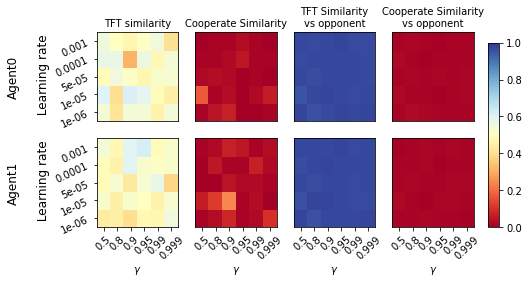

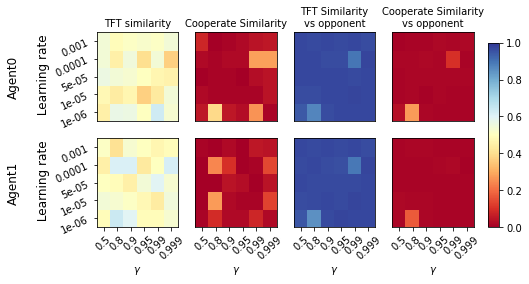

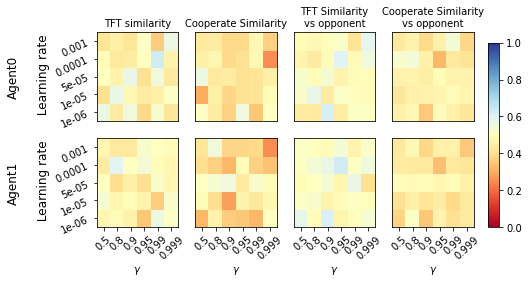

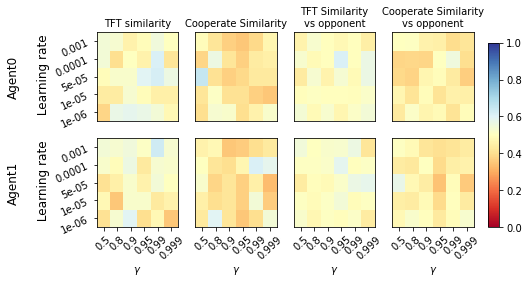

In [39]:
base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/'
exp_dirs = ['MA_PPO2/']
save_titles = ['ppo_ma_grid1.png']

# base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/big1/MA/'
# exp_dirs = ['MA_PPO1/']

# base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/'
# exp_dirs = ['MA_DQN2/']

# save_titles = ['dqn_ma_grid1.png']
titles = [None]


# exp_dir = exp_dirs[0]

# base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/MA_lstm/'
# base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/MA_statelen/'


# exp_dirs = [
#             'MA_random_length_nodoneatend_DQN1_statelen1/',
#             'MA_random_length_nodoneatend_DQN2_statelen1/',
#             'MA_random_length_DQN1_statelen1/', 
#             'MA_random_length_DQN2_statelen1/',
#             'MA_random_length_nodoneatend_DQN1_statelen5/',
#             'MA_random_length_nodoneatend_DQN2_statelen5/',
#             'MA_random_length_DQN1_statelen5/', 
#             'MA_random_length_DQN2_statelen5/']

# exp_dirs = ['MA_random_length_nodoneatend_PPO1_statelen1/',
#             'MA_random_length_nodoneatend_PPO2_statelen1/',
#             'MA_random_length_nodoneatend_PPO1_statelen5/',
#             'MA_random_length_nodoneatend_PPO2_statelen5/',
#             'MA_random_length_PPO1_statelen1/', 
#             'MA_random_length_PPO2_statelen1/',
#             'MA_random_length_PPO1_statelen5/', 
#             'MA_random_length_PPO2_statelen5/'
#             ]

# exp_dirs = [
#             'MA_random_length_nodoneatend_DQN1_statelen1/',
#             'MA_random_length_nodoneatend_DQN2_statelen1/',
#             'MA_random_length_nodoneatend_DQN1_statelen5/',
#             'MA_random_length_nodoneatend_DQN2_statelen5/',
#             'MA_random_length_DQN1_statelen1/', 
#             'MA_random_length_DQN2_statelen1/',
#             'MA_random_length_DQN1_statelen5/', 
#             'MA_random_length_DQN2_statelen5/',
#             'MA_random_length_nodoneatend_PPO1_statelen1/',
#             'MA_random_length_nodoneatend_PPO2_statelen1/',
#             'MA_random_length_nodoneatend_PPO1_statelen5/',
#             'MA_random_length_nodoneatend_PPO2_statelen5/',
#             'MA_random_length_PPO1_statelen1/', 
#             'MA_random_length_PPO2_statelen1/',
#             'MA_random_length_PPO1_statelen5/', 
#             'MA_random_length_PPO2_statelen5/'
#             ]
# exp_dirs = [exp_dirs[0]]

def title_fun(exp_dir):
    title = ''
    
    if 'PPO' in exp_dir:
        title += 'PPO, '
    elif 'DQN' in exp_dir:
        title += 'DQN, '
        
    if '1_' in exp_dir:
        title += 'hidden layers: [16, 16], '
    elif '2_' in exp_dir:
        title += 'hidden layers: [1024,512,256,32,8], '
        
    if 'nodoneatend' in exp_dir:
        title += 'no \'done\', '
        
    if 'statelen1' in exp_dir:
        title += 'state length: 1, '

    elif 'statelen5' in exp_dir:
        title += 'state length: 5, '
    
    title = title[:-2]
    
    return title



# titles = [title_fun(exp_dir) for exp_dir in exp_dirs]


# base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/MA_ppo_rerun_rl/'

# exp_dirs = ['MA_PPO2_same/', 'MA_PPO2_diff/', 'MA_PPO2_diff_sl5/', 'MA_PPO2_diff_sl5_2/']

# exp_dirs  = [exp_dirs[0]]

base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/'
exp_dirs = ['MA_random_length_DQN2/',
#             'MA_random_length_DQN3/',
            'MA_random_length_nodoneatend_DQN2_2/',
            'MA_random_length_PPO2/', 
            'MA_random_length_nodoneatend_PPO2/',
           ]

titles = [None]*4
save_titles = ['dqn_rl_ma_grid1.png',
               'dqn_rl_nodone_ma_grid1.png',
               'ppo_rl_ma_grid1.png',
               'ppo_rl_nodone_ma_grid1.png',
              ]


# base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/MA_ppo_rerun'
# exp_dirs = [
#             '/MA_PPO2_diff/',
#             '/MA_PPO2_diff_sl5/',
#             '/MA_PPO2_diff_sl5_2/',
#             '_rl/MA_PPO2_diff/',
#             '_rl/MA_PPO2_diff_sl5/',
#             '_rl/MA_PPO2_diff_sl5_2/',
#            ]


# titles= exp_dirs
# titles = ['DQN',
#           'DQN, no \'done\' signal',
#           'PPO',
#           'PPO, no \'done\' signal']

# titles= ['DQN, hidden layers: 1024,512,256,32,8']
# titles= ['PPO, hidden layers: 1024,512,256,32,8']

title_fs = None
lr_fs = 12
gamma_fs = None
for dir_num, exp_dir in enumerate(exp_dirs):

    # exp_dir = 'PPO_single_t4td/'
    data1 = pd.read_pickle(base_dir + exp_dir + 'data_save')
#     print(data1)
    if len(data1) == 0:
        continue
    lr_options  = sorted(data1['lr'].unique())
    gamma_options = sorted(data1['gamma'].unique())

    ep_mean_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    t4t_frac0_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac0_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan
    t4t_frac1_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac1_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan

    for ii in range(len(data1)):
        lr_i = lr_options.index(data1.loc[ii].lr)

        gamma_i = gamma_options.index(data1.loc[ii].gamma)


        ep_mean_arr[lr_i, gamma_i] = data1.loc[ii].final_episode_reward_mean

        t4t_frac0_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac0
        coop_frac0_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac0
        t4t_frac1_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac1
        coop_frac1_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac1
        
    fig = plt.figure(figsize=(7.8,4.2))

    plt_position_t4t = [1, 5]
    plt_position_coop = [2, 6]
    
    for ii, (t4t_frac_arr, coop_frac_arr) in enumerate([(t4t_frac0_arr, coop_frac0_arr),(t4t_frac1_arr, coop_frac1_arr)]):
        print(ii)
        fig.add_subplot(2,4,plt_position_t4t[ii])

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, t4t_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=43);
        if ii == 0:
            plt.xticks([])
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.ylabel(f'Agent{ii}\n \n Learning rate', fontsize=lr_fs)
#         plt.xlabel('$\gamma$', fontsize=15)
        if ii == 1:
            plt.xlabel('$\gamma$', fontsize=gamma_fs)
        if ii == 0:
            plt.title(f'TFT similarity', fontsize=title_fs)
#         plt.colorbar()
        plt.clim([0,1])

        fig.add_subplot(2,4,plt_position_coop[ii])

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, coop_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=43);
        if ii == 0:
            plt.xticks([])
#         plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.yticks([])
#         plt.colorbar()
#         plt.ylabel('Learning rate', fontsize=15)
#         plt.xlabel('$\gamma$', fontsize=15)
        if ii == 1:
            plt.xlabel('$\gamma$', fontsize=gamma_fs)
        if ii == 0:
            plt.title(f'Cooperate Similarity', fontsize=title_fs)
        plt.suptitle(titles[dir_num], fontsize=gamma_fs)
        plt.clim([0,1])
        print(exp_dir)
        print('max t4t frac: ',np.max(np.nan_to_num(t4t_frac_arr)))
        print('mean t4t frac: ',np.mean(np.nan_to_num(t4t_frac_arr)))
        print('std t4t frac: ',np.std(np.nan_to_num(t4t_frac_arr)))

    # exp_dir = 'PPO_single_t4td/'
    data1 = pd.read_pickle(base_dir + exp_dir + 'data_save_play_agents2')
#     print(data1)
    if len(data1) == 0:
        continue
    lr_options  = sorted(data1['lr'].unique())
    gamma_options = sorted(data1['gamma'].unique())

    ep_mean_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    t4t_frac0_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac0_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan
    t4t_frac1_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac1_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan

    
    
    plt_position_t4t = [3, 7]
    plt_position_coop = [4, 8]
    
    for ii in range(len(data1)):
        lr_i = lr_options.index(data1.loc[ii].lr)

        gamma_i = gamma_options.index(data1.loc[ii].gamma)


        ep_mean_arr[lr_i, gamma_i] = data1.loc[ii].final_episode_reward_mean

        t4t_frac0_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac0
        coop_frac0_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac0
        t4t_frac1_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac1
        coop_frac1_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac1
    
    for ii, (t4t_frac_arr, coop_frac_arr) in enumerate([(t4t_frac0_arr, coop_frac0_arr),(t4t_frac1_arr, coop_frac1_arr)]):
        print(ii)
        fig.add_subplot(2,4,plt_position_t4t[ii])

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, t4t_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=43);
        if ii == 0:
            plt.xticks([])
#         plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.yticks([])
#         plt.ylabel('Learning rate', fontsize=15)
#         plt.xlabel('$\gamma$', fontsize=15)
        if ii == 1:
            plt.xlabel('$\gamma$', fontsize=gamma_fs)
        if ii == 0:
            plt.title(f'TFT Similarity\nvs opponent', fontsize=title_fs)
#         plt.colorbar()
        plt.clim([0,1])

        fig.add_subplot(2,4,plt_position_coop[ii])

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        im = plt.pcolor(x1, y1, coop_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=43);
        if ii == 0:
            plt.xticks([])
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.yticks([])
#         plt.colorbar()
#         plt.ylabel('Learning rate', fontsize=15)
        if ii == 1:
            plt.xlabel('$\gamma$', fontsize=gamma_fs)
        if ii == 0:
            plt.title(f'Cooperate Similarity\nvs opponent', fontsize=title_fs)
        plt.suptitle(titles[dir_num], fontsize=13)
        plt.clim([0,1])
    plt.tight_layout()
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.875, 0.20, 0.02, 0.61])
    fig.colorbar(im, cax=cbar_ax)
    

#     plt.savefig('grid_' + exp_dir[:-1], bbox_inches='tight')
    plt.savefig(save_titles[dir_num], bbox_inches='tight')
    


0
MA_PPO2/
max t4t frac:  0.61
mean t4t frac:  0.503
std t4t frac:  0.05814636704042653
1
MA_PPO2/
max t4t frac:  0.68
mean t4t frac:  0.5076666666666667
std t4t frac:  0.07319760166077091
0
1


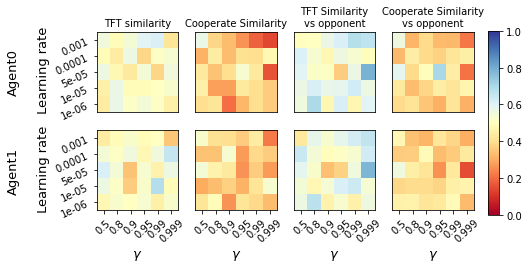

In [63]:
base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/'
exp_dirs = ['MA_PPO2/']
save_titles = ['ppo_ma_grid1.png']

# base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/big1/MA/'
# exp_dirs = ['MA_PPO1/']

# base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/'
# exp_dirs = ['MA_DQN2/']
# save_titles = ['dqn_ma_grid1.png']

titles = [None]


# exp_dir = exp_dirs[0]

# base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/MA_lstm/'
# base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/MA_statelen/'


# exp_dirs = [
#             'MA_random_length_nodoneatend_DQN1_statelen1/',
#             'MA_random_length_nodoneatend_DQN2_statelen1/',
#             'MA_random_length_DQN1_statelen1/', 
#             'MA_random_length_DQN2_statelen1/',
#             'MA_random_length_nodoneatend_DQN1_statelen5/',
#             'MA_random_length_nodoneatend_DQN2_statelen5/',
#             'MA_random_length_DQN1_statelen5/', 
#             'MA_random_length_DQN2_statelen5/']

# exp_dirs = ['MA_random_length_nodoneatend_PPO1_statelen1/',
#             'MA_random_length_nodoneatend_PPO2_statelen1/',
#             'MA_random_length_nodoneatend_PPO1_statelen5/',
#             'MA_random_length_nodoneatend_PPO2_statelen5/',
#             'MA_random_length_PPO1_statelen1/', 
#             'MA_random_length_PPO2_statelen1/',
#             'MA_random_length_PPO1_statelen5/', 
#             'MA_random_length_PPO2_statelen5/'
#             ]

# exp_dirs = [
# #             'MA_random_length_nodoneatend_DQN1_statelen1/',
# #             'MA_random_length_nodoneatend_DQN2_statelen1/',
# #             'MA_random_length_nodoneatend_DQN1_statelen5/',
# #             'MA_random_length_nodoneatend_DQN2_statelen5/',
#             'MA_random_length_DQN1_statelen1/', 
#             'MA_random_length_DQN2_statelen1/',
#             'MA_random_length_DQN1_statelen5/', 
#             'MA_random_length_DQN2_statelen5/',
# #             'MA_random_length_nodoneatend_PPO1_statelen1/',
# #             'MA_random_length_nodoneatend_PPO2_statelen1/',
# #             'MA_random_length_nodoneatend_PPO1_statelen5/',
# #             'MA_random_length_nodoneatend_PPO2_statelen5/',
#             'MA_random_length_PPO1_statelen1/', 
#             'MA_random_length_PPO2_statelen1/',
#             'MA_random_length_PPO1_statelen5/', 
#             'MA_random_length_PPO2_statelen5/'
#             ]
# exp_dirs = [exp_dirs[0]]

def title_fun(exp_dir):
    title = ''
    
    if 'PPO' in exp_dir:
        title += 'PPO, '
    elif 'DQN' in exp_dir:
        title += 'DQN, '
        
    if '1_' in exp_dir:
        title += 'hidden layers: [16, 16], '
    elif '2_' in exp_dir:
        title += 'hidden layers: [1024,512,256,32,8], '
        
    if 'nodoneatend' in exp_dir:
        title += 'no \'done\', '
        
    if 'statelen1' in exp_dir:
        title += 'state length: 1, '

    elif 'statelen5' in exp_dir:
        title += 'state length: 5, '
    
    title = title[:-2]
    
    return title



# titles = [title_fun(exp_dir) for exp_dir in exp_dirs]
# save_titles = ['grid_' + exp_dir[:-1] for exp_dir in exp_dirs]

# base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/MA_ppo_rerun_rl/'

# exp_dirs = ['MA_PPO2_same/', 'MA_PPO2_diff/', 'MA_PPO2_diff_sl5/', 'MA_PPO2_diff_sl5_2/']

# exp_dirs  = [exp_dirs[0]]

# base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/'
# exp_dirs = ['MA_random_length_DQN2/',
# #             'MA_random_length_DQN3/',
#             'MA_random_length_nodoneatend_DQN2_2/',
#             'MA_random_length_PPO2/', 
#             'MA_random_length_nodoneatend_PPO2/',
#            ]

# titles = [None]*4
# save_titles = ['dqn_rl_ma_grid1.png',
#                'dqn_rl_nodone_ma_grid1.png',
#                'ppo_rl_ma_grid1.png',
#                'ppo_rl_nodone_ma_grid1.png',
#               ]


# base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/MA_ppo_rerun'
# exp_dirs = [
#             '/MA_PPO2_diff/',
#             '/MA_PPO2_diff_sl5/',
#             '/MA_PPO2_diff_sl5_2/',
#             '_rl/MA_PPO2_diff/',
#             '_rl/MA_PPO2_diff_sl5/',
#             '_rl/MA_PPO2_diff_sl5_2/',
#            ]


# titles= exp_dirs
# titles = ['DQN',
#           'DQN, no \'done\' signal',
#           'PPO',
#           'PPO, no \'done\' signal']

# titles= ['DQN, hidden layers: 1024,512,256,32,8']
# titles= ['PPO, hidden layers: 1024,512,256,32,8']

# exp_dirs = [exp_dirs[0]]
title_fs = None
lr_fs = 13
gamma_fs = 13
for dir_num, exp_dir in enumerate(exp_dirs):

    # exp_dir = 'PPO_single_t4td/'
    data1 = pd.read_pickle(base_dir + exp_dir + 'data_save')
#     print(data1)
    if len(data1) == 0:
        continue
    lr_options  = sorted(data1['lr'].unique())
    gamma_options = sorted(data1['gamma'].unique())

    ep_mean_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    t4t_frac0_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac0_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan
    t4t_frac1_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac1_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan

    for ii in range(len(data1)):
        lr_i = lr_options.index(data1.loc[ii].lr)

        gamma_i = gamma_options.index(data1.loc[ii].gamma)


        ep_mean_arr[lr_i, gamma_i] = data1.loc[ii].final_episode_reward_mean

        t4t_frac0_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac0
        coop_frac0_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac0
        t4t_frac1_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac1
        coop_frac1_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac1
        
    fig = plt.figure(figsize=(7.8,4.))

    plt_position_t4t = [1, 5]
    plt_position_coop = [2, 6]
    
    for ii, (t4t_frac_arr, coop_frac_arr) in enumerate([(t4t_frac0_arr, coop_frac0_arr),(t4t_frac1_arr, coop_frac1_arr)]):
        print(ii)
        fig.add_subplot(2,4,plt_position_t4t[ii])

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, t4t_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=43);
        if ii == 0:
            plt.xticks([])
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.ylabel(f'Agent{ii}\n \n Learning rate', fontsize=lr_fs)
#         plt.xlabel('$\gamma$', fontsize=15)
        if ii == 1:
            plt.xlabel('$\gamma$', fontsize=gamma_fs)
        if ii == 0:
            plt.title(f'TFT similarity', fontsize=title_fs)
#         plt.colorbar()
        plt.clim([0,1])

        fig.add_subplot(2,4,plt_position_coop[ii])

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, coop_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=43);
        if ii == 0:
            plt.xticks([])
#         plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.yticks([])
#         plt.colorbar()
#         plt.ylabel('Learning rate', fontsize=15)
#         plt.xlabel('$\gamma$', fontsize=15)
        if ii == 1:
            plt.xlabel('$\gamma$', fontsize=gamma_fs)
        if ii == 0:
            plt.title(f'Cooperate Similarity', fontsize=title_fs)
        plt.suptitle(titles[dir_num], fontsize=gamma_fs)
        plt.clim([0,1])
        print(exp_dir)
        print('max t4t frac: ',np.max(np.nan_to_num(t4t_frac_arr)))
        print('mean t4t frac: ',np.mean(np.nan_to_num(t4t_frac_arr)))
        print('std t4t frac: ',np.std(np.nan_to_num(t4t_frac_arr)))

    # exp_dir = 'PPO_single_t4td/'
    data1 = pd.read_pickle(base_dir + exp_dir + 'data_save_play_agents2')
#     print(data1)
    if len(data1) == 0:
        continue
    lr_options  = sorted(data1['lr'].unique())
    gamma_options = sorted(data1['gamma'].unique())

    ep_mean_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    t4t_frac0_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac0_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan
    t4t_frac1_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac1_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan

    
    
    plt_position_t4t = [3, 7]
    plt_position_coop = [4, 8]
    
    for ii in range(len(data1)):
        lr_i = lr_options.index(data1.loc[ii].lr)

        gamma_i = gamma_options.index(data1.loc[ii].gamma)


        ep_mean_arr[lr_i, gamma_i] = data1.loc[ii].final_episode_reward_mean

        t4t_frac0_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac0
        coop_frac0_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac0
        t4t_frac1_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac1
        coop_frac1_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac1
    
    for ii, (t4t_frac_arr, coop_frac_arr) in enumerate([(t4t_frac0_arr, coop_frac0_arr),(t4t_frac1_arr, coop_frac1_arr)]):
        print(ii)
        fig.add_subplot(2,4,plt_position_t4t[ii])

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, t4t_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=43);
        if ii == 0:
            plt.xticks([])
#         plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.yticks([])
#         plt.ylabel('Learning rate', fontsize=15)
#         plt.xlabel('$\gamma$', fontsize=15)
        if ii == 1:
            plt.xlabel('$\gamma$', fontsize=gamma_fs)
        if ii == 0:
            plt.title(f'TFT Similarity\nvs opponent', fontsize=title_fs)
#         plt.colorbar()
        plt.clim([0,1])

        fig.add_subplot(2,4,plt_position_coop[ii])

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        im = plt.pcolor(x1, y1, coop_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=43);
        if ii == 0:
            plt.xticks([])
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.yticks([])
#         plt.colorbar()
#         plt.ylabel('Learning rate', fontsize=15)
        if ii == 1:
            plt.xlabel('$\gamma$', fontsize=gamma_fs)
        if ii == 0:
            plt.title(f'Cooperate Similarity\nvs opponent', fontsize=title_fs)
        plt.suptitle(titles[dir_num], fontsize=13)
        plt.clim([0,1])
    plt.tight_layout()
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.875, 0.20, 0.02, 0.64])
    fig.colorbar(im, cax=cbar_ax)
    

#     plt.savefig('grid_' + exp_dir[:-1], bbox_inches='tight')
    plt.savefig(save_titles[dir_num], bbox_inches='tight', dpi=200)
    


0
MA_random_length_DQN2/
max t4t frac:  0.61
mean t4t frac:  0.5086666666666667
std t4t frac:  0.06422529788867382
1
MA_random_length_DQN2/
max t4t frac:  0.62
mean t4t frac:  0.5009999999999999
std t4t frac:  0.05399691349203828
0
1
0
MA_random_length_nodoneatend_DQN2_2/
max t4t frac:  0.63
mean t4t frac:  0.49966666666666676
std t4t frac:  0.05907528153880343
1
MA_random_length_nodoneatend_DQN2_2/
max t4t frac:  0.64
mean t4t frac:  0.517
std t4t frac:  0.05733817808987888
0
1
0
MA_random_length_PPO2/
max t4t frac:  0.63
mean t4t frac:  0.478
std t4t frac:  0.06373905134740136
1
MA_random_length_PPO2/
max t4t frac:  0.59
mean t4t frac:  0.476
std t4t frac:  0.05301572093885612
0
1
0
MA_random_length_nodoneatend_PPO2/
max t4t frac:  0.62
mean t4t frac:  0.5073333333333334
std t4t frac:  0.06043913375362761
1
MA_random_length_nodoneatend_PPO2/
max t4t frac:  0.63
mean t4t frac:  0.4913333333333333
std t4t frac:  0.0646391694116054
0
1


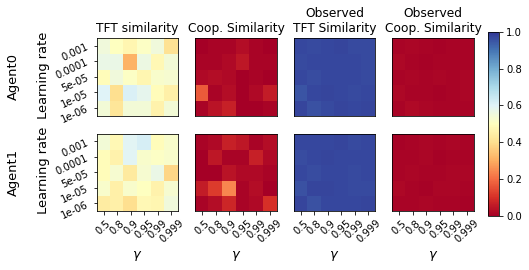

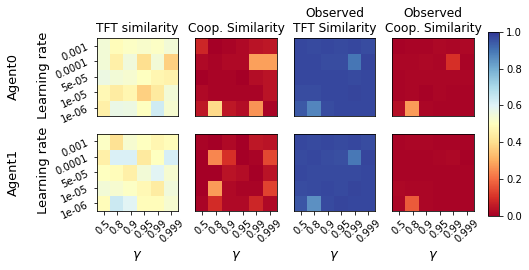

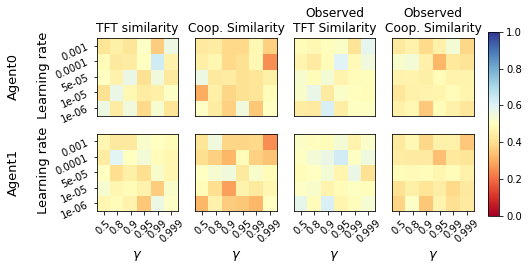

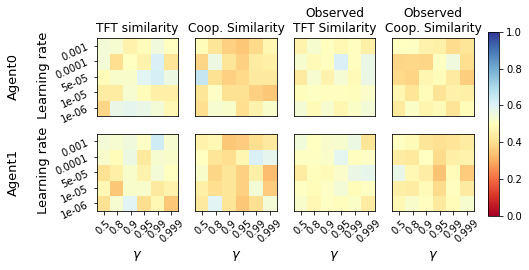

In [70]:
base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/'
exp_dirs = ['MA_PPO2/']
save_titles = ['ppo_ma_grid1.png']

# base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/big1/MA/'
# exp_dirs = ['MA_PPO1/']

base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/'
exp_dirs = ['MA_DQN2/']
save_titles = ['dqn_ma_grid1.png']

titles = [None]


# exp_dir = exp_dirs[0]

# base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/MA_lstm/'
base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/MA_statelen/'


# exp_dirs = [
#             'MA_random_length_nodoneatend_DQN1_statelen1/',
#             'MA_random_length_nodoneatend_DQN2_statelen1/',
#             'MA_random_length_DQN1_statelen1/', 
#             'MA_random_length_DQN2_statelen1/',
#             'MA_random_length_nodoneatend_DQN1_statelen5/',
#             'MA_random_length_nodoneatend_DQN2_statelen5/',
#             'MA_random_length_DQN1_statelen5/', 
#             'MA_random_length_DQN2_statelen5/']

# exp_dirs = ['MA_random_length_nodoneatend_PPO1_statelen1/',
#             'MA_random_length_nodoneatend_PPO2_statelen1/',
#             'MA_random_length_nodoneatend_PPO1_statelen5/',
#             'MA_random_length_nodoneatend_PPO2_statelen5/',
#             'MA_random_length_PPO1_statelen1/', 
#             'MA_random_length_PPO2_statelen1/',
#             'MA_random_length_PPO1_statelen5/', 
#             'MA_random_length_PPO2_statelen5/'
#             ]

exp_dirs = [
#             'MA_random_length_nodoneatend_DQN1_statelen1/',
#             'MA_random_length_nodoneatend_DQN2_statelen1/',
#             'MA_random_length_nodoneatend_DQN1_statelen5/',
#             'MA_random_length_nodoneatend_DQN2_statelen5/',
            'MA_random_length_DQN1_statelen1/', 
            'MA_random_length_DQN2_statelen1/',
            'MA_random_length_DQN1_statelen5/', 
            'MA_random_length_DQN2_statelen5/',
#             'MA_random_length_nodoneatend_PPO1_statelen1/',
#             'MA_random_length_nodoneatend_PPO2_statelen1/',
#             'MA_random_length_nodoneatend_PPO1_statelen5/',
#             'MA_random_length_nodoneatend_PPO2_statelen5/',
            'MA_random_length_PPO1_statelen1/', 
            'MA_random_length_PPO2_statelen1/',
            'MA_random_length_PPO1_statelen5/', 
            'MA_random_length_PPO2_statelen5/'
            ]
# exp_dirs = [exp_dirs[0]]

def title_fun(exp_dir):
    title = ''
    
    if 'PPO' in exp_dir:
        title += 'PPO, '
    elif 'DQN' in exp_dir:
        title += 'DQN, '
        
    if '1_' in exp_dir:
        title += 'hidden layers: [16, 16], '
    elif '2_' in exp_dir:
        title += 'hidden layers: [1024,512,256,32,8], '
        
    if 'nodoneatend' in exp_dir:
        title += 'no \'done\', '
        
    if 'statelen1' in exp_dir:
        title += 'state length: 1, '

    elif 'statelen5' in exp_dir:
        title += 'state length: 5, '
    
    title = title[:-2]
    
    return title



titles = [title_fun(exp_dir) for exp_dir in exp_dirs]
save_titles = ['grid_' + exp_dir[:-1] for exp_dir in exp_dirs]

# base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/MA_ppo_rerun_rl/'

# exp_dirs = ['MA_PPO2_same/', 'MA_PPO2_diff/', 'MA_PPO2_diff_sl5/', 'MA_PPO2_diff_sl5_2/']

# exp_dirs  = [exp_dirs[0]]

base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/'
exp_dirs = ['MA_random_length_DQN2/',
#             'MA_random_length_DQN3/',
            'MA_random_length_nodoneatend_DQN2_2/',
            'MA_random_length_PPO2/', 
            'MA_random_length_nodoneatend_PPO2/',
           ]

titles = [None]*4
save_titles = ['dqn_rl_ma_grid1.png',
               'dqn_rl_nodone_ma_grid1.png',
               'ppo_rl_ma_grid1.png',
               'ppo_rl_nodone_ma_grid1.png',
              ]


# base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/MA_ppo_rerun'
# exp_dirs = [
#             '/MA_PPO2_diff/',
#             '/MA_PPO2_diff_sl5/',
#             '/MA_PPO2_diff_sl5_2/',
#             '_rl/MA_PPO2_diff/',
#             '_rl/MA_PPO2_diff_sl5/',
#             '_rl/MA_PPO2_diff_sl5_2/',
#            ]


# titles= exp_dirs
# titles = ['DQN',
#           'DQN, no \'done\' signal',
#           'PPO',
#           'PPO, no \'done\' signal']

# titles= ['DQN, hidden layers: 1024,512,256,32,8']
# titles= ['PPO, hidden layers: 1024,512,256,32,8']

# exp_dirs = [exp_dirs[0]]
title_fs = 12.2
lr_fs = 13
gamma_fs = 13
for dir_num, exp_dir in enumerate(exp_dirs):

    # exp_dir = 'PPO_single_t4td/'
    data1 = pd.read_pickle(base_dir + exp_dir + 'data_save')
#     print(data1)
    if len(data1) == 0:
        continue
    lr_options  = sorted(data1['lr'].unique())
    gamma_options = sorted(data1['gamma'].unique())

    ep_mean_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    t4t_frac0_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac0_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan
    t4t_frac1_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac1_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan

    for ii in range(len(data1)):
        lr_i = lr_options.index(data1.loc[ii].lr)

        gamma_i = gamma_options.index(data1.loc[ii].gamma)


        ep_mean_arr[lr_i, gamma_i] = data1.loc[ii].final_episode_reward_mean

        t4t_frac0_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac0
        coop_frac0_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac0
        t4t_frac1_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac1
        coop_frac1_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac1
        
    fig = plt.figure(figsize=(7.8,4.))

    plt_position_t4t = [1, 5]
    plt_position_coop = [2, 6]
    
    for ii, (t4t_frac_arr, coop_frac_arr) in enumerate([(t4t_frac0_arr, coop_frac0_arr),(t4t_frac1_arr, coop_frac1_arr)]):
        print(ii)
        fig.add_subplot(2,4,plt_position_t4t[ii])

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, t4t_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=43);
        if ii == 0:
            plt.xticks([])
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.ylabel(f'Agent{ii}\n \n Learning rate', fontsize=lr_fs)
#         plt.xlabel('$\gamma$', fontsize=15)
        if ii == 1:
            plt.xlabel('$\gamma$', fontsize=gamma_fs)
        if ii == 0:
            plt.title(f'TFT similarity', fontsize=title_fs)
#         plt.colorbar()
        plt.clim([0,1])

        fig.add_subplot(2,4,plt_position_coop[ii])

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, coop_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=43);
        if ii == 0:
            plt.xticks([])
#         plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.yticks([])
#         plt.colorbar()
#         plt.ylabel('Learning rate', fontsize=15)
#         plt.xlabel('$\gamma$', fontsize=15)
        if ii == 1:
            plt.xlabel('$\gamma$', fontsize=gamma_fs)
        if ii == 0:
            plt.title(f'Coop. Similarity', fontsize=title_fs)
        plt.suptitle(titles[dir_num], fontsize=gamma_fs)
        plt.clim([0,1])
        print(exp_dir)
        print('max t4t frac: ',np.max(np.nan_to_num(t4t_frac_arr)))
        print('mean t4t frac: ',np.mean(np.nan_to_num(t4t_frac_arr)))
        print('std t4t frac: ',np.std(np.nan_to_num(t4t_frac_arr)))

    # exp_dir = 'PPO_single_t4td/'
    data1 = pd.read_pickle(base_dir + exp_dir + 'data_save_play_agents2')
#     print(data1)
    if len(data1) == 0:
        continue
    lr_options  = sorted(data1['lr'].unique())
    gamma_options = sorted(data1['gamma'].unique())

    ep_mean_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    t4t_frac0_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac0_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan
    t4t_frac1_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac1_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan

    
    
    plt_position_t4t = [3, 7]
    plt_position_coop = [4, 8]
    
    for ii in range(len(data1)):
        lr_i = lr_options.index(data1.loc[ii].lr)

        gamma_i = gamma_options.index(data1.loc[ii].gamma)


        ep_mean_arr[lr_i, gamma_i] = data1.loc[ii].final_episode_reward_mean

        t4t_frac0_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac0
        coop_frac0_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac0
        t4t_frac1_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac1
        coop_frac1_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac1
    
    for ii, (t4t_frac_arr, coop_frac_arr) in enumerate([(t4t_frac0_arr, coop_frac0_arr),(t4t_frac1_arr, coop_frac1_arr)]):
        print(ii)
        fig.add_subplot(2,4,plt_position_t4t[ii])

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, t4t_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=43);
        if ii == 0:
            plt.xticks([])
#         plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.yticks([])
#         plt.ylabel('Learning rate', fontsize=15)
#         plt.xlabel('$\gamma$', fontsize=15)
        if ii == 1:
            plt.xlabel('$\gamma$', fontsize=gamma_fs)
        if ii == 0:
            plt.title(f'Observed\nTFT Similarity', fontsize=title_fs)
#         plt.colorbar()
        plt.clim([0,1])

        fig.add_subplot(2,4,plt_position_coop[ii])

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        im = plt.pcolor(x1, y1, coop_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=43);
        if ii == 0:
            plt.xticks([])
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.yticks([])
#         plt.colorbar()
#         plt.ylabel('Learning rate', fontsize=15)
        if ii == 1:
            plt.xlabel('$\gamma$', fontsize=gamma_fs)
        if ii == 0:
            plt.title(f'Observed\nCoop. Similarity', fontsize=title_fs)
        plt.suptitle(titles[dir_num], fontsize=13)
        plt.clim([0,1])
    plt.tight_layout()
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.875, 0.20, 0.02, 0.64])
    fig.colorbar(im, cax=cbar_ax)
    

#     plt.savefig('grid_' + exp_dir[:-1], bbox_inches='tight')
    plt.savefig(save_titles[dir_num], bbox_inches='tight', dpi=200)
    
